In [15]:
import pandas as pd

# File paths
forest_path = r"C:\Users\tanishq\Desktop\bird specie analysis\Bird_Monitoring_Data_FOREST.XLSX"
grassland_path = r"C:\Users\tanishq\Desktop\bird specie analysis\Bird_Monitoring_Data_GRASSLAND.XLSX"

# Load all sheets from Forest file
forest_excel = pd.ExcelFile(forest_path)
forest_dfs = [forest_excel.parse(sheet).assign(Habitat_Type='Forest') for sheet in forest_excel.sheet_names]
forest_combined = pd.concat(forest_dfs, ignore_index=True)

# Load all sheets from Grassland file
grassland_excel = pd.ExcelFile(grassland_path)
grassland_dfs = [grassland_excel.parse(sheet).assign(Habitat_Type='Grassland') for sheet in grassland_excel.sheet_names]
grassland_combined = pd.concat(grassland_dfs, ignore_index=True)

# Combine both into one DataFrame
combined_df = pd.concat([forest_combined, grassland_combined], ignore_index=True)

# Preview
print("Forest data shape:", forest_combined.shape)
print("Grassland data shape:", grassland_combined.shape)
print("Total combined shape:", combined_df.shape)
print("Habitat types:", combined_df['Habitat_Type'].unique())
print("\nSample data:\n", combined_df.head())


Forest data shape: (8546, 30)
Grassland data shape: (8531, 30)
Total combined shape: (17077, 32)
Habitat types: ['Forest' 'Grassland']

Sample data:
   Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
1            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
2            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
3            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
4            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   

        Date Start_Time  End_Time          Observer  ...  \
0 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...   
1 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...   
2 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...   
3 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...   
4 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...   

  Regional_Stewardship_Status Te

C:\Users\tanishq\AppData\Local\Temp\ipykernel_17252\276776784.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  grassland_combined = pd.concat(grassland_dfs, ignore_index=True)


In [16]:
print("Forest data shape:", forest_combined.shape)
print("Grassland data shape:", grassland_combined.shape)
print("Total combined shape:", combined_df.shape)
print("Habitat types:", combined_df['Habitat_Type'].unique())
print("\nSample data:\n", combined_df.head())

Forest data shape: (8546, 30)
Grassland data shape: (8531, 30)
Total combined shape: (17077, 32)
Habitat types: ['Forest' 'Grassland']

Sample data:
   Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
1            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
2            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
3            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
4            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   

        Date Start_Time  End_Time          Observer  ...  \
0 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...   
1 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...   
2 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...   
3 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...   
4 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...   

  Regional_Stewardship_Status Te

In [17]:
[combined_df['Habitat_Type'] == 'Grassland']

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 17072     True
 17073     True
 17074     True
 17075     True
 17076     True
 Name: Habitat_Type, Length: 17077, dtype: bool]

In [18]:
# Drop duplicates
combined_df = combined_df.drop_duplicates()

# Drop less relevant columns for initial EDA
drop_cols = ['AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'TaxonCode', 'Previously_Obs']
combined_df = combined_df.drop(columns=drop_cols, errors='ignore')

# Convert environmental columns to numeric
combined_df['Temperature'] = pd.to_numeric(combined_df['Temperature'], errors='coerce')
combined_df['Humidity'] = pd.to_numeric(combined_df['Humidity'], errors='coerce')

In [19]:
print("Cleaned Data Shape:", combined_df.shape)

Cleaned Data Shape: (15372, 27)


In [20]:
combined_df[:1000]

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,Scientific_Name,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat_Type
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,Pipilo erythrophthalmus,False,True,19.900000,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,Sitta carolinensis,False,False,19.900000,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,Melanerpes carolinus,False,False,19.900000,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,Icterus spurius,False,False,19.900000,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,Mimus polyglottos,False,False,19.900000,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CATO,NaN,CATO 5,CATO-0242,Forest,2018,2018-06-28,05:55:00,06:05:00,Kimberly Serno,...,Coccyzus americanus,False,False,23.200001,76.099998,Fog,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,Forest
996,CATO,NaN,CATO 5,CATO-0242,Forest,2018,2018-06-28,05:55:00,06:05:00,Kimberly Serno,...,Hylocichla mustelina,True,True,23.200001,76.099998,Fog,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True,Forest
997,CATO,NaN,CATO 5,CATO-0242,Forest,2018,2018-06-28,05:55:00,06:05:00,Kimberly Serno,...,Sitta carolinensis,False,False,23.200001,76.099998,Fog,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True,Forest
998,CATO,NaN,CATO 5,CATO-0242,Forest,2018,2018-06-28,05:55:00,06:05:00,Kimberly Serno,...,Vireo olivaceus,False,False,23.200001,76.099998,Fog,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True,Forest


In [21]:
[combined_df['Habitat_Type'] == 'Grassland']

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 17060     True
 17061     True
 17062     True
 17063     True
 17067     True
 Name: Habitat_Type, Length: 15372, dtype: bool]

In [22]:
# Drop high-null column
combined_df = combined_df.drop(columns=['Sub_Unit_Code'], errors='ignore')

# Fill 'Sex' with 'Undetermined'
combined_df['Sex'] = combined_df['Sex'].fillna('Undetermined')

# Fill 'Distance' with 'Unknown'
combined_df['Distance'] = combined_df['Distance'].fillna('Unknown')

# Fill 'ID_Method' with most frequent method
id_method_mode = combined_df['ID_Method'].mode()[0]
combined_df['ID_Method'] = combined_df['ID_Method'].fillna(id_method_mode)

# Confirm all critical nulls are handled
print("Remaining Nulls:\n", combined_df.isnull().sum().sort_values(ascending=False))


Remaining Nulls:
 Site_Name                      6826
Admin_Unit_Code                   0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         0
Distance                          0
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Initial_Three_Min_Cnt             0
Habitat_Type                      0
dtype: int64


In [12]:
import mysql.connector

# Step 1: Connect to MySQL (no database yet)
connection = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="123456789"
)

# Step 2: Create a cursor
cursor = connection.cursor()

# Step 3: Create the new database
cursor.execute("CREATE DATABASE IF NOT EXISTS birds_dataset")

# Step 4: Confirm
print("Database 'birds_dataset' created or already exists.")

# Step 5: Optional — switch to new database for future operations
cursor.execute("USE birds_dataset")
print(" Now using database: birds_dataset3")


Database 'birds_dataset' created or already exists.
 Now using database: birds_dataset


In [10]:
# Count unique species per habitat
species_richness = combined_df.groupby('Habitat_Type')['Common_Name'].nunique()
print("Unique species in each habitat:\n", species_richness)


Unique species in each habitat:
 Habitat_Type
Forest       108
Grassland    107
Name: Common_Name, dtype: int64


In [15]:
# Convert 'Date' to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Create Month column
combined_df['Month'] = combined_df['Date'].dt.month

# Create Temperature Bins
combined_df['Temp_Bin'] = pd.cut(combined_df['Temperature'], bins=[-10, 10, 20, 30, 40],
                                 labels=['<=10°C', '11-20°C', '21-30°C', '31-40°C'])

# Create Humidity Bins
combined_df['Humidity_Bin'] = pd.cut(combined_df['Humidity'], bins=[0, 30, 60, 90, 100],
                                     labels=['0-30%', '31-60%', '61-90%', '91-100%'])


In [23]:
# Create the table
cursor.execute("""
CREATE TABLE bird_data3 (
    Admin_Unit_Code VARCHAR(10),
    Site_Name VARCHAR(100),
    Plot_Name VARCHAR(100),
    Location_Type VARCHAR(50),
    Year INT,
    Date DATE,
    Start_Time TIME,
    End_Time TIME,
    Observer VARCHAR(100),
    Visit INT,
    Interval_Length VARCHAR(50),
    ID_Method VARCHAR(50),
    Distance VARCHAR(50),
    Flyover_Observed BOOLEAN,
    Sex VARCHAR(20),
    Common_Name VARCHAR(100),
    Scientific_Name VARCHAR(100),
    PIF_Watchlist_Status BOOLEAN,
    Regional_Stewardship_Status BOOLEAN,
    Temperature FLOAT,
    Humidity FLOAT,
    Sky VARCHAR(50),
    Wind VARCHAR(100),
    Disturbance VARCHAR(100),
    Initial_Three_Min_Cnt BOOLEAN,
    Habitat_Type VARCHAR(20),
    Month INT,
    Temp_Bin VARCHAR(20),
    Humidity_Bin VARCHAR(20)
)
""")

print("Table 'bird_data3' created successfully in 'birds_dataset'.")

Table 'bird_data3' created successfully in 'birds_dataset'.


In [26]:
for i, row in combined_df.iterrows():
    cursor.execute("""
        INSERT INTO bird_data3 VALUES (
            %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
            %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
            %s, %s, %s, %s, %s, %s, %s, %s, %s
        )
    """, tuple(None if pd.isna(x) else x for x in row.values))




In [27]:
# Save changes
connection.commit()
print(" All data inserted into bird_data3.")

 All data inserted into bird_data3.


In [30]:
# 1. Species Richness by Habitat
print(" Unique Species by Habitat")
cursor.execute("""
    SELECT Habitat_Type, COUNT(DISTINCT Common_Name) AS Unique_Species
    FROM bird_data3
    GROUP BY Habitat_Type;
""")
for row in cursor.fetchall():
    print(row)

 Unique Species by Habitat
('Forest', 108)
('Grassland', 107)


In [31]:
# 2. Observation Count by Year and Habitat
print(" Observations by Year and Habitat")
cursor.execute("""
    SELECT Year, Habitat_Type, COUNT(*) AS Total_Observations
    FROM bird_data3
    GROUP BY Year, Habitat_Type
    ORDER BY Year;
""")
for row in cursor.fetchall():
    print(row)

# 3. Monthly Observation Trends
print(" Monthly Observations by Habitat")
cursor.execute("""
    SELECT Month, Habitat_Type, COUNT(*) AS Monthly_Observations
    FROM bird_data3
    GROUP BY Month, Habitat_Type
    ORDER BY Month;
""")
for row in cursor.fetchall():
    print(row)

# 4. Top 10 Most Observed Birds
print(" Top 10 Most Observed Birds (Overall)")
cursor.execute("""
    SELECT Common_Name, COUNT(*) AS Observations
    FROM bird_data3
    GROUP BY Common_Name
    ORDER BY Observations DESC
    LIMIT 10;
""")
for row in cursor.fetchall():
    print(row)

# 5. Top Bird Species by Habitat
print("Top Bird Species by Habitat")
cursor.execute("""
    SELECT Habitat_Type, Common_Name, COUNT(*) AS Observations
    FROM bird_data3
    GROUP BY Habitat_Type, Common_Name
    ORDER BY Habitat_Type, Observations DESC;
""")
for row in cursor.fetchall():
    print(row)

# 6. Observations by Temperature Bin
print("Observation Count by Temperature Bin")
cursor.execute("""
    SELECT Temp_Bin, Habitat_Type, COUNT(*) AS Observations
    FROM bird_data3
    GROUP BY Temp_Bin, Habitat_Type
    ORDER BY Temp_Bin;
""")
for row in cursor.fetchall():
    print(row)

# 7. Observations by Humidity Bin
print(" Observation Count by Humidity Bin")
cursor.execute("""
    SELECT Humidity_Bin, Habitat_Type, COUNT(*) AS Observations
    FROM bird_data3
    GROUP BY Humidity_Bin, Habitat_Type
    ORDER BY Humidity_Bin;
""")
for row in cursor.fetchall():
    print(row)

 Observations by Year and Habitat
(2018, 'Forest', 8546)
(2018, 'Grassland', 6826)
 Monthly Observations by Habitat
(5, 'Forest', 2390)
(5, 'Grassland', 2474)
(6, 'Forest', 4013)
(6, 'Grassland', 2198)
(7, 'Forest', 2143)
(7, 'Grassland', 2154)
 Top 10 Most Observed Birds (Overall)
('Northern Cardinal', 1125)
('Carolina Wren', 993)
('Red-eyed Vireo', 738)
('Eastern Tufted Titmouse', 720)
('Indigo Bunting', 611)
('Eastern Wood-Pewee', 574)
('Field Sparrow', 492)
('Red-bellied Woodpecker', 489)
('American Robin', 470)
('Acadian Flycatcher', 462)
Top Bird Species by Habitat
('Forest', 'Red-eyed Vireo', 694)
('Forest', 'Carolina Wren', 646)
('Forest', 'Northern Cardinal', 595)
('Forest', 'Eastern Tufted Titmouse', 541)
('Forest', 'Eastern Wood-Pewee', 486)
('Forest', 'Acadian Flycatcher', 436)
('Forest', 'Red-bellied Woodpecker', 398)
('Forest', 'Blue-gray Gnatcatcher', 310)
('Forest', 'Ovenbird', 303)
('Forest', 'American Robin', 294)
('Forest', 'Wood Thrush', 290)
('Forest', 'Carolina Ch

In [2]:
import pandas as pd
query = "SELECT * FROM bird_data3"
combined_df = pd.read_sql(query, connection)


C:\Users\tanishq\AppData\Local\Temp\ipykernel_19444\753633880.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  combined_df = pd.read_sql(query, connection)


In [33]:
pip install matplotlib seaborn



   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------- -------------------- 3.9/8.1 MB 18.1 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 15.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 13.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 15.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


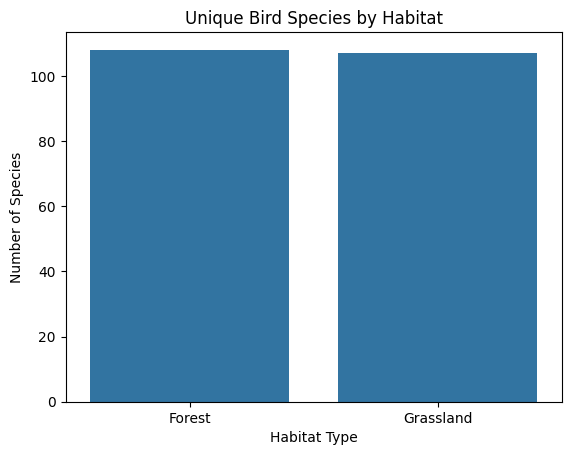

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

species_richness = combined_df.groupby('Habitat_Type')['Common_Name'].nunique().reset_index()
sns.barplot(data=species_richness, x='Habitat_Type', y='Common_Name')
plt.title("Unique Bird Species by Habitat")
plt.ylabel("Number of Species")
plt.xlabel("Habitat Type")
plt.show()


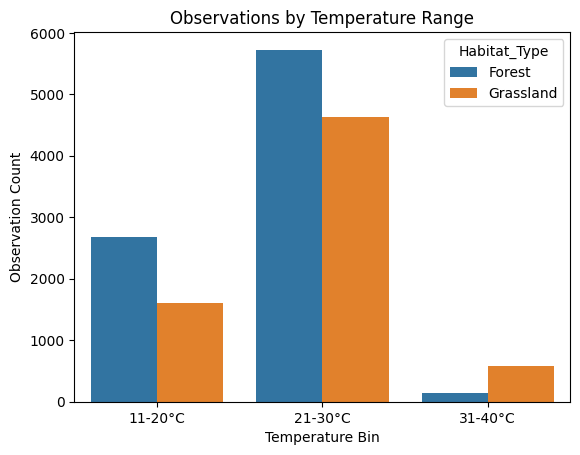

In [36]:
temp_bin = combined_df.groupby(['Temp_Bin', 'Habitat_Type']).size().reset_index(name='Count')
sns.barplot(data=temp_bin, x='Temp_Bin', y='Count', hue='Habitat_Type')
plt.title("Observations by Temperature Range")
plt.xlabel("Temperature Bin")
plt.ylabel("Observation Count")
plt.show()


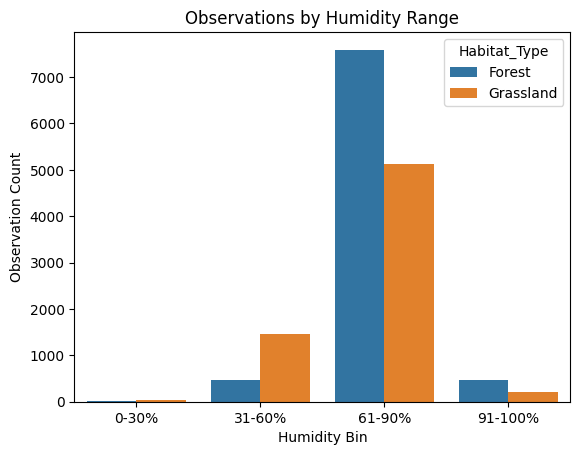

In [37]:
humidity_bin = combined_df.groupby(['Humidity_Bin', 'Habitat_Type']).size().reset_index(name='Count')
sns.barplot(data=humidity_bin, x='Humidity_Bin', y='Count', hue='Habitat_Type')
plt.title("Observations by Humidity Range")
plt.xlabel("Humidity Bin")
plt.ylabel("Observation Count")
plt.show()


C:\Users\tanishq\AppData\Local\Temp\ipykernel_39396\810829158.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_species, x='Observations', y='Common_Name', palette='viridis')


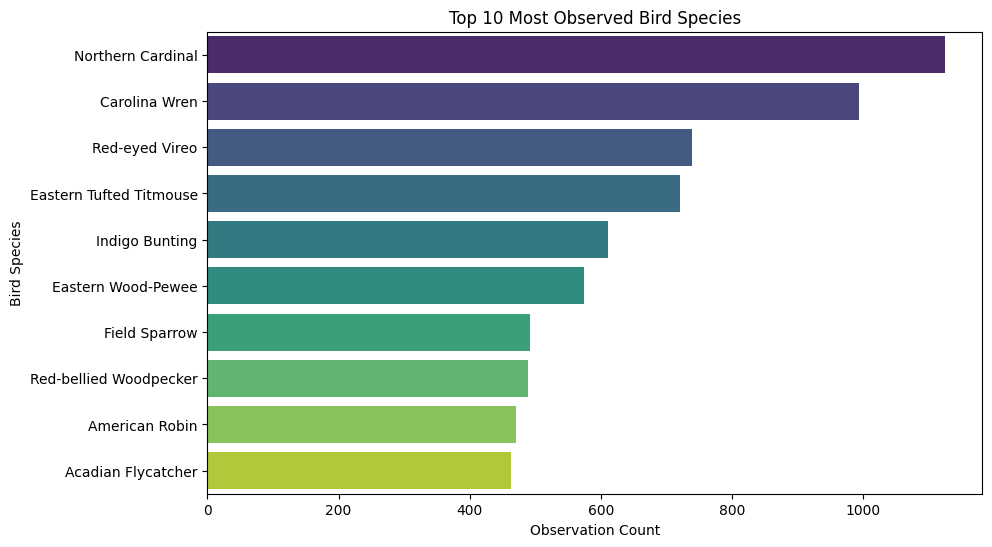

In [38]:
top_species = combined_df['Common_Name'].value_counts().head(10).reset_index()
top_species.columns = ['Common_Name', 'Observations']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=top_species, x='Observations', y='Common_Name', palette='viridis')
plt.title("Top 10 Most Observed Bird Species")
plt.xlabel("Observation Count")
plt.ylabel("Bird Species")
plt.show()


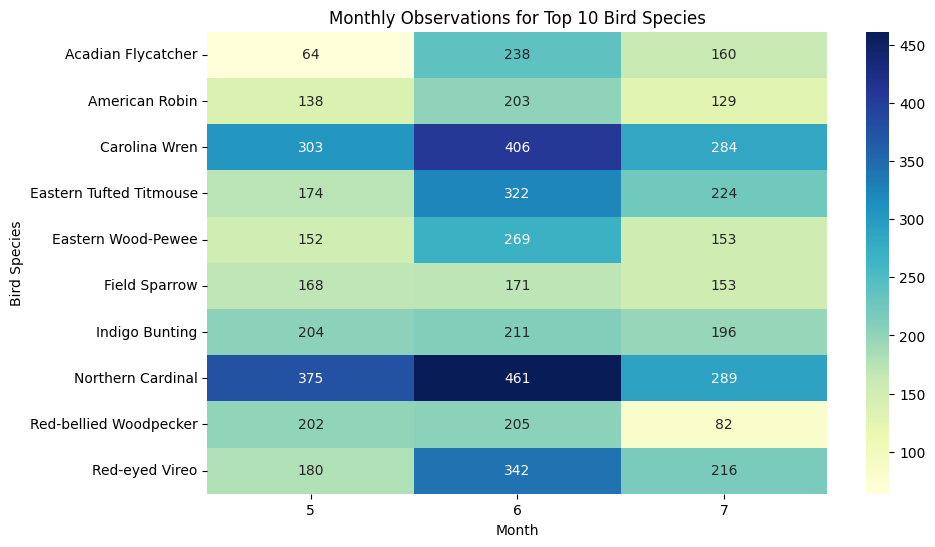

In [41]:
# Step 1: Identify top 10 species
top_10_species = combined_df['Common_Name'].value_counts().head(10).index.tolist()

# Step 2: Filter data
heatmap_df = combined_df[combined_df['Common_Name'].isin(top_10_species)]

# Step 3: Group by species and month
species_month = heatmap_df.groupby(['Common_Name', 'Month']).size().unstack(fill_value=0)

# Step 4: Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(species_month, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Monthly Observations for Top 10 Bird Species")
plt.xlabel("Month")
plt.ylabel("Bird Species")
plt.show()


In [42]:
import pandas as pd

# Group by Admin Unit and Habitat, count unique species
species_by_unit_habitat = combined_df.groupby(['Admin_Unit_Code', 'Habitat_Type'])['Common_Name'].nunique().reset_index()

# Rename column for clarity
species_by_unit_habitat.columns = ['Admin_Unit_Code', 'Habitat_Type', 'Unique_Species_Count']

# Show result
print(species_by_unit_habitat.sort_values(by='Unique_Species_Count', ascending=False))


   Admin_Unit_Code Habitat_Type  Unique_Species_Count
10            MONO    Grassland                    93
3             CHOH       Forest                    80
1             ANTI    Grassland                    78
8             MANA    Grassland                    75
11            NACE       Forest                    66
7             MANA       Forest                    57
9             MONO       Forest                    55
12            PRWI       Forest                    54
4             GWMP       Forest                    49
5             HAFE       Forest                    47
0             ANTI       Forest                    46
2             CATO       Forest                    46
13            ROCR       Forest                    45
6             HAFE    Grassland                    32
14            WOTR       Forest                    27


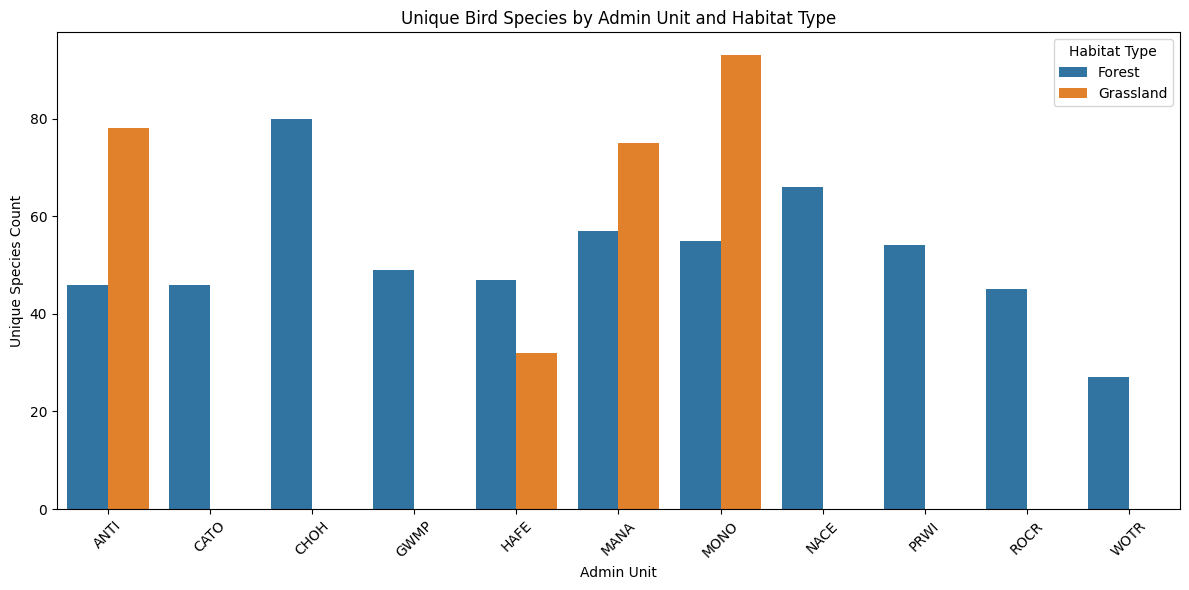

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=species_by_unit_habitat, x='Admin_Unit_Code', y='Unique_Species_Count', hue='Habitat_Type')
plt.title("Unique Bird Species by Admin Unit and Habitat Type")
plt.xlabel("Admin Unit")
plt.ylabel("Unique Species Count")
plt.legend(title='Habitat Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

combined_df['Season'] = combined_df['Month'].apply(get_season)


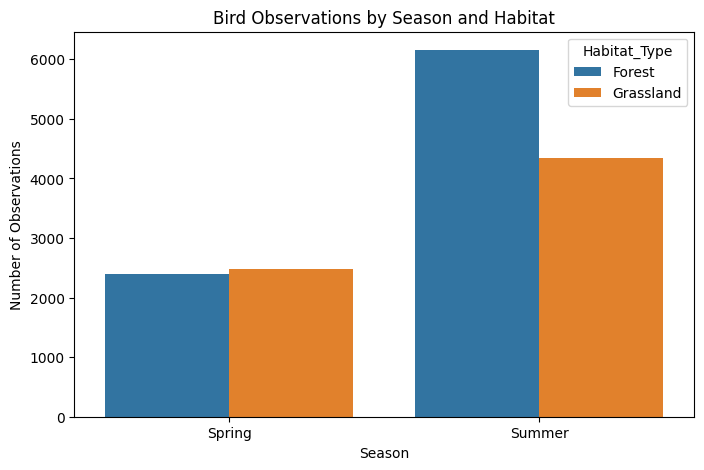

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

seasonal_counts = combined_df.groupby(['Season', 'Habitat_Type']).size().reset_index(name='Observation_Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_counts, x='Season', y='Observation_Count', hue='Habitat_Type')
plt.title("Bird Observations by Season and Habitat")
plt.ylabel("Number of Observations")
plt.xlabel("Season")
plt.show()


In [73]:
#spatial analysis
location_richness = combined_df.groupby('Location_Type')['Common_Name'].nunique().reset_index()
location_richness.columns = ['Location_Type', 'Unique_Species_Count']
print(location_richness.sort_values(by='Unique_Species_Count', ascending=False))



  Location_Type  Unique_Species_Count
0        Forest                   108
1     Grassland                   107


In [1]:
import mysql.connector

# Step 1: Connect to MySQL (no database yet)
connection = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="123456789"
)

# Step 2: Create a cursor
cursor = connection.cursor()

# Step 3: Select the database
cursor.execute("USE birds_dataset")
print("Now using database: birds_dataset")


Now using database: birds_dataset


In [2]:
import pandas as pd
query = "SELECT * FROM bird_data3"
combined_df = pd.read_sql(query, connection)



C:\Users\tanishq\AppData\Local\Temp\ipykernel_19244\3017245829.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  combined_df = pd.read_sql(query, connection)


In [74]:
# Count total number of bird observations per plot
plot_obs = combined_df['Plot_Name'].value_counts().reset_index()
plot_obs.columns = ['Plot_Name', 'Observation_Count']

# Show top 10 most active plots
top10_observation_plots = plot_obs.head(10)
print(top10_observation_plots)



   Plot_Name  Observation_Count
0  ANTI-0163                 54
1  HAFE-0067                 52
2  ANTI-0028                 52
3  MANA-0048                 50
4  ANTI-0016                 49
5  ANTI-0161                 48
6  ANTI-0184                 48
7  MONO-0037                 48
8  ANTI-0034                 48
9  MONO-0057                 48


In [75]:
plot_richness = combined_df.groupby('Plot_Name')['Common_Name'].nunique().reset_index()
plot_richness.columns = ['Plot_Name', 'Unique_Species_Count']
plot_richness = plot_richness.sort_values(by='Unique_Species_Count', ascending=False)
print(plot_richness.head(10))


     Plot_Name  Unique_Species_Count
384  MONO-0057                    27
288  MANA-0047                    27
40   ANTI-0105                    27
183  CHOH-0812                    26
409  MONO-0085                    26
392  MONO-0066                    26
402  MONO-0076                    26
289  MANA-0048                    26
2    ANTI-0009                    25
75   ANTI-0160                    25


In [76]:
# Total number of bird observations per plot
plot_obs = combined_df['Plot_Name'].value_counts().reset_index()
plot_obs.columns = ['Plot_Name', 'Observation_Count']

# Unique species count per plot
plot_richness = combined_df.groupby('Plot_Name')['Common_Name'].nunique().reset_index()
plot_richness.columns = ['Plot_Name', 'Unique_Species_Count']

# Merge both metrics into one DataFrame
plot_analysis = pd.merge(plot_obs, plot_richness, on='Plot_Name')

# Sort and display top 10 by species richness
top10_plots = plot_analysis.sort_values(by='Unique_Species_Count', ascending=False).head(10)
print(top10_plots)


    Plot_Name  Observation_Count  Unique_Species_Count
14  MANA-0047                 46                    27
10  ANTI-0105                 47                    27
9   MONO-0057                 48                    27
25  MONO-0076                 43                    26
28  CHOH-0812                 42                    26
3   MANA-0048                 50                    26
17  MONO-0066                 45                    26
48  MONO-0085                 40                    26
24  ANTI-0160                 44                    25
8   ANTI-0034                 48                    25


In [77]:
# Total observation count per plot
plot_obs = combined_df['Plot_Name'].value_counts().reset_index()
plot_obs.columns = ['Plot_Name', 'Observation_Count']

# Unique species count per plot
plot_richness = combined_df.groupby('Plot_Name')['Common_Name'].nunique().reset_index()
plot_richness.columns = ['Plot_Name', 'Unique_Species_Count']

# Merge both
plot_analysis = pd.merge(plot_obs, plot_richness, on='Plot_Name')


In [78]:
# Get habitat type for each plot (assuming it's consistent per plot)
plot_habitat = combined_df.groupby('Plot_Name')['Habitat_Type'].first().reset_index()

# Merge with earlier plot-level analysis
plot_analysis = pd.merge(plot_analysis, plot_habitat, on='Plot_Name')


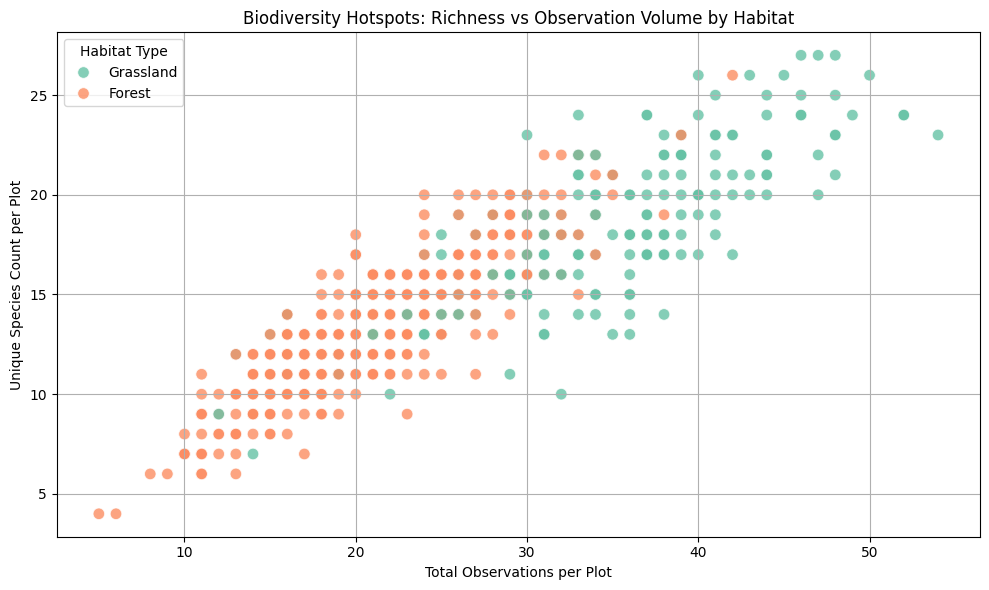

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_analysis,
    x='Observation_Count',
    y='Unique_Species_Count',
    hue='Habitat_Type',
    palette='Set2',
    s=70,
    alpha=0.8
)

plt.title("Biodiversity Hotspots: Richness vs Observation Volume by Habitat")
plt.xlabel("Total Observations per Plot")
plt.ylabel("Unique Species Count per Plot")
plt.grid(True)
plt.legend(title='Habitat Type')
plt.tight_layout()
plt.show()


In [80]:
# Total number of observations
obs_counts = combined_df.groupby('Location_Type').size().reset_index(name='Total_Observations')

# Unique species per Location_Type
species_counts = combined_df.groupby('Location_Type')['Common_Name'].nunique().reset_index(name='Unique_Species_Count')

# Merge both
location_summary = pd.merge(obs_counts, species_counts, on='Location_Type')


In [81]:
print(location_summary.sort_values(by='Unique_Species_Count', ascending=False))


  Location_Type  Total_Observations  Unique_Species_Count
0        Forest                8546                   108
1     Grassland                6826                   107


In [83]:
# Step 1: Get top 5 most observed species
top5_species = (
    combined_df['Common_Name']
    .value_counts()
    .head(10)
    .index
)

# Step 2: Filter combined_df for only those top 5 species
top5_df = combined_df[combined_df['Common_Name'].isin(top5_species)]

# Step 3: Pivot table (Species vs Location_Type)
species_matrix_top5 = top5_df.pivot_table(
    index='Common_Name',
    columns='Location_Type',
    values='Scientific_Name',  # any column just to count
    aggfunc='count',
    fill_value=0
)

# Step 4: Display the result
print(species_matrix_top5)



Location_Type            Forest  Grassland
Common_Name                               
Acadian Flycatcher          436         26
American Robin              294        176
Carolina Wren               646        347
Eastern Tufted Titmouse     541        179
Eastern Wood-Pewee          486         88
Field Sparrow                36        456
Indigo Bunting              150        461
Northern Cardinal           595        530
Red-bellied Woodpecker      398         91
Red-eyed Vireo              694         44


In [84]:
#3
# Unique species count overall
total_species = combined_df['Scientific_Name'].nunique()
print(f"Total Unique Bird Species Observed: {total_species}")

# Unique species per Location_Type
species_by_location = combined_df.groupby('Location_Type')['Scientific_Name'].nunique().reset_index()
species_by_location.columns = ['Location_Type', 'Unique_Species_Count']
print(species_by_location)


Total Unique Bird Species Observed: 127
  Location_Type  Unique_Species_Count
0        Forest                   108
1     Grassland                   107


In [85]:
# Most common ID methods
id_method_counts = combined_df['ID_Method'].value_counts().reset_index()
id_method_counts.columns = ['ID_Method', 'Count']
print("Top ID Methods:\n", id_method_counts)

# Most frequent interval lengths
interval_counts = combined_df['Interval_Length'].value_counts().reset_index()
interval_counts.columns = ['Interval_Length', 'Count']
print("\nMost Common Observation Intervals:\n", interval_counts)


Top ID Methods:
        ID_Method  Count
0        Singing   9623
1        Calling   3941
2  Visualization   1808

Most Common Observation Intervals:
   Interval_Length  Count
0       0-2.5 min   7755
1     2.5 - 5 min   3149
2     5 - 7.5 min   2386
3    7.5 - 10 min   2082


In [93]:
# Filter rows with known sex
sex_data = combined_df[combined_df['Sex'].isin(['Male', 'Female'])]

# Group by species and sex count
sex_counts = sex_data.groupby(['Common_Name', 'Sex']).size().unstack(fill_value=0)

# Optional: Add a ratio column
sex_counts['Male_to_Female_Ratio'] = sex_counts['Male'] / (sex_counts['Female'] + 1e-9)  # avoid division by zero

# Sort by most male-biased
sex_counts_sorted = sex_counts.sort_values(by='Male_to_Female_Ratio', ascending=False)
print(sex_counts_sorted.head(10))


Sex                  Female  Male  Male_to_Female_Ratio
Common_Name                                            
Field Sparrow             0   443          4.430000e+11
Chipping Sparrow          0   330          3.300000e+11
Grasshopper Sparrow       0   323          3.230000e+11
Song Sparrow              0   213          2.130000e+11
Eastern Towhee            0   132          1.320000e+11
Eastern Wood-Pewee        0    88          8.800000e+10
Carolina Chickadee        0    49          4.900000e+10
Red-eyed Vireo            0    44          4.400000e+10
Warbling Vireo            0    32          3.200000e+10
Gray Catbird              0    29          2.900000e+10


In [94]:
#Sex ratio analysis reveals a strong observational bias toward male birds,
#particularly for species like Field Sparrow, Chipping Sparrow, and Grasshopper Sparrow, where no females were recorded. 
#This likely stems from the identification method (singing and calling), which disproportionately captures vocal male individuals.                       
#This suggests a need for more balanced observational techniques in biodiversity surveys.”

In [95]:
# Group by Sky and count observations
sky_counts = combined_df['Sky'].value_counts().reset_index()
sky_counts.columns = ['Sky_Condition', 'Observation_Count']
print("Bird Observations by Sky Condition:\n", sky_counts)

# Group by Wind
wind_counts = combined_df['Wind'].value_counts().reset_index()
wind_counts.columns = ['Wind_Condition', 'Observation_Count']
print("\nBird Observations by Wind Condition:\n", wind_counts)


Bird Observations by Sky Condition:
          Sky_Condition  Observation_Count
0        Partly Cloudy               6172
1  Clear or Few Clouds               5333
2      Cloudy/Overcast               2917
3                  Fog                598
4         Mist/Drizzle                352

Bird Observations by Wind Condition:
                                Wind_Condition  Observation_Count
0   Light air movement (1-3 mph) smoke drifts               7636
1       Calm (< 1 mph) smoke rises vertically               4210
2    Light breeze (4-7 mph) wind felt on face               3161
3  Gentle breeze (8-12 mph), leaves in motion                365


C:\Users\tanishq\AppData\Local\Temp\ipykernel_12004\3077086015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sky_counts, x='Observation_Count', y='Sky_Condition', palette='Blues_r')


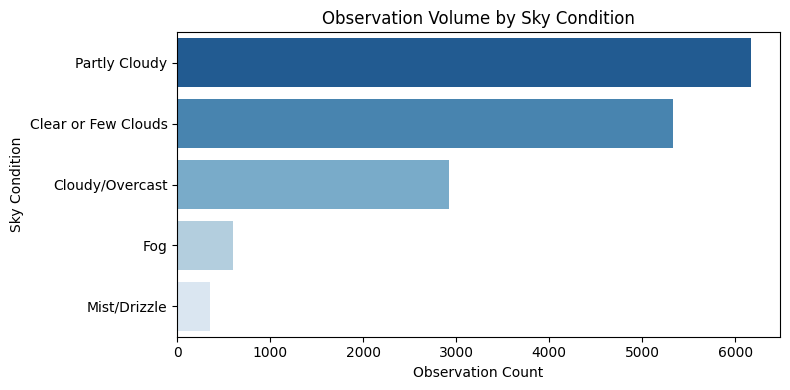

C:\Users\tanishq\AppData\Local\Temp\ipykernel_12004\3077086015.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wind_counts, x='Observation_Count', y='Wind_Condition', palette='Greens_r')


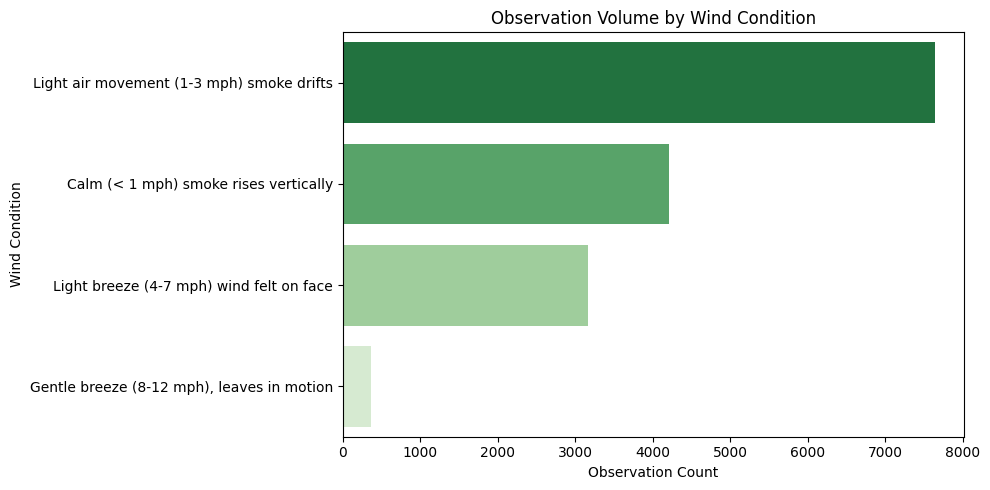

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sky Condition Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=sky_counts, x='Observation_Count', y='Sky_Condition', palette='Blues_r')
plt.title("Observation Volume by Sky Condition")
plt.xlabel("Observation Count")
plt.ylabel("Sky Condition")
plt.tight_layout()
plt.show()

# Wind Condition Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=wind_counts, x='Observation_Count', y='Wind_Condition', palette='Greens_r')
plt.title("Observation Volume by Wind Condition")
plt.xlabel("Observation Count")
plt.ylabel("Wind Condition")
plt.tight_layout()
plt.show()


In [97]:
# Crosstab: Distance category vs Sky
distance_sky = pd.crosstab(combined_df['Distance'], combined_df['Sky'])
print("Bird Distance Distribution Across Sky Conditions:\n", distance_sky)

# Crosstab: Distance vs Temperature bins (if already created)
# If not created, we can bin again and plot


Bird Distance Distribution Across Sky Conditions:
 Sky              Clear or Few Clouds  Cloudy/Overcast  Fog  Mist/Drizzle  \
Distance                                                                   
50 - 100 Meters                 2672             1479  275           157   
<= 50 Meters                    2446             1288  289           179   
Unknown                          215              150   34            16   

Sky              Partly Cloudy  
Distance                        
50 - 100 Meters           3191  
<= 50 Meters              2707  
Unknown                    274  


Observation Count by Disturbance Type:
            Disturbance_Type  Observation_Count
0        No effect on count               7525
1    Slight effect on count               5840
2  Moderate effect on count               1577
3   Serious effect on count                430


C:\Users\tanishq\AppData\Local\Temp\ipykernel_12004\1694549889.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=disturbance_effect, x='Observation_Count', y='Disturbance_Type', palette='Reds_r')


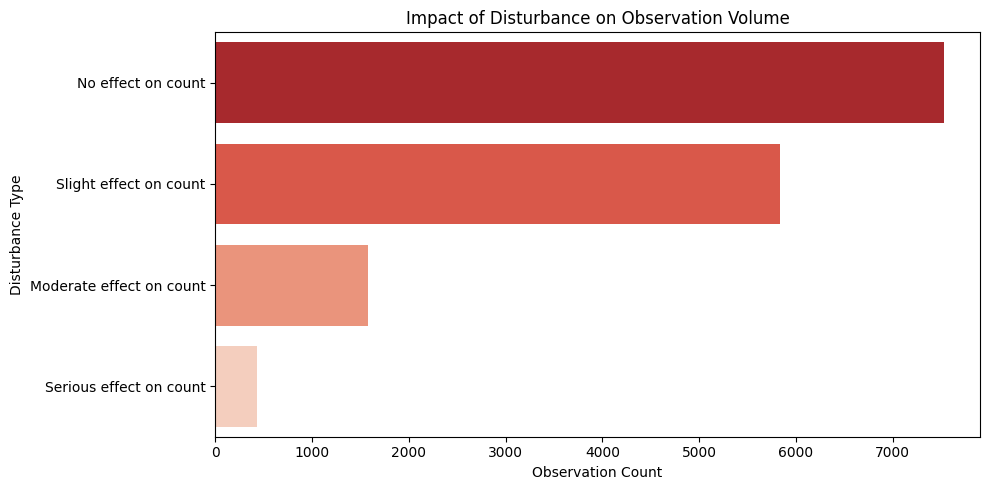

In [98]:
# Group by Disturbance category and count
disturbance_effect = combined_df['Disturbance'].value_counts().reset_index()
disturbance_effect.columns = ['Disturbance_Type', 'Observation_Count']
print("Observation Count by Disturbance Type:\n", disturbance_effect)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=disturbance_effect, x='Observation_Count', y='Disturbance_Type', palette='Reds_r')
plt.title("Impact of Disturbance on Observation Volume")
plt.xlabel("Observation Count")
plt.ylabel("Disturbance Type")
plt.tight_layout()
plt.show()


In [101]:
#5. Distance and Behavior
distance_counts = combined_df['Distance'].value_counts().reset_index()
distance_counts.columns = ['Distance', 'Observation_Count']
print(distance_counts)


          Distance  Observation_Count
0  50 - 100 Meters               7774
1     <= 50 Meters               6909
2          Unknown                689


In [102]:
# Group by Distance and Common_Name
species_distance = (
    combined_df.groupby(['Distance', 'Common_Name'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Distance', 'Count'], ascending=[True, False])
)

# Top 5 species per distance category
top_species_by_distance = species_distance.groupby('Distance').head(5)
print(top_species_by_distance)


            Distance              Common_Name  Count
63   50 - 100 Meters        Northern Cardinal    568
25   50 - 100 Meters            Carolina Wren    556
44   50 - 100 Meters       Eastern Wood-Pewee    415
78   50 - 100 Meters           Red-eyed Vireo    414
43   50 - 100 Meters  Eastern Tufted Titmouse    398
176     <= 50 Meters        Northern Cardinal    551
138     <= 50 Meters            Carolina Wren    437
190     <= 50 Meters           Red-eyed Vireo    324
153     <= 50 Meters  Eastern Tufted Titmouse    322
130     <= 50 Meters    Blue-gray Gnatcatcher    306
234          Unknown           Common Grackle     94
222          Unknown       American Goldfinch     83
227          Unknown             Barn Swallow     69
239          Unknown        European Starling     53
258          Unknown     Red-winged Blackbird     43


In [103]:
flyover_counts = combined_df['Flyover_Observed'].value_counts().reset_index()
flyover_counts.columns = ['Flyover_Observed', 'Observation_Count']
print("Flyover Observation Summary:\n", flyover_counts)


Flyover Observation Summary:
    Flyover_Observed  Observation_Count
0                 0              14683
1                 1                689


In [104]:
flyover_species = (
    combined_df[combined_df['Flyover_Observed'] == True]
    .groupby('Common_Name')
    .size()
    .reset_index(name='Flyover_Count')
    .sort_values('Flyover_Count', ascending=False)
    .head(10)
)
print("Top 10 Flyover Species:\n", flyover_species)


Top 10 Flyover Species:
              Common_Name  Flyover_Count
13        Common Grackle             94
1     American Goldfinch             83
6           Barn Swallow             69
18     European Starling             53
37  Red-winged Blackbird             43
27         Mourning Dove             39
11         Cedar Waxwing             39
41        Turkey Vulture             38
0          American Crow             35
40          Tree Swallow             20


C:\Users\tanishq\AppData\Local\Temp\ipykernel_12004\2061772705.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=flyover_species, x='Flyover_Count', y='Common_Name', palette='Purples_r')


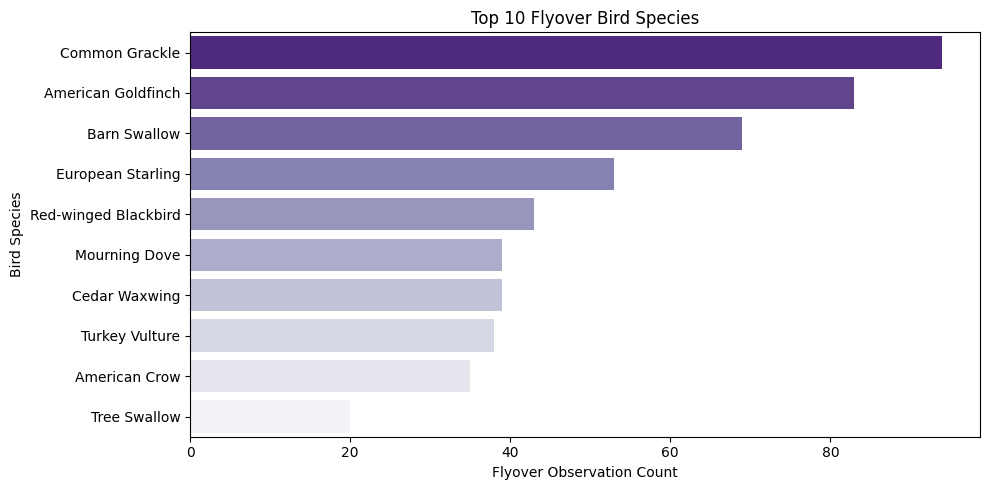

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot flyover frequency
plt.figure(figsize=(10, 5))
sns.barplot(data=flyover_species, x='Flyover_Count', y='Common_Name', palette='Purples_r')
plt.title("Top 10 Flyover Bird Species")
plt.xlabel("Flyover Observation Count")
plt.ylabel("Bird Species")
plt.tight_layout()
plt.show()


In [106]:
observer_counts = combined_df['Observer'].value_counts().reset_index()
observer_counts.columns = ['Observer', 'Observation_Count']
print(observer_counts.head(10))  # Top 10 most active observers


           Observer  Observation_Count
0  Elizabeth Oswald               5763
1    Kimberly Serno               5346
2    Brian Swimelar               4263


In [107]:
observer_diversity = (
    combined_df.groupby('Observer')['Common_Name']
    .nunique()
    .reset_index()
    .rename(columns={'Common_Name': 'Unique_Species_Count'})
    .sort_values(by='Unique_Species_Count', ascending=False)
)
print(observer_diversity.head(10))


           Observer  Unique_Species_Count
1  Elizabeth Oswald                   119
2    Kimberly Serno                    90
0    Brian Swimelar                    83


In [109]:
visit_species = (
    combined_df.groupby(['Plot_Name', 'Visit'])['Common_Name']
    .nunique()
    .reset_index()
    .groupby('Visit')['Common_Name']
    .mean()
    .reset_index()
    .rename(columns={'Common_Name': 'Avg_Species_Per_Visit'})
)
print(visit_species)


   Visit  Avg_Species_Per_Visit
0      1               9.218543
1      2               8.575908
2      3               8.449495


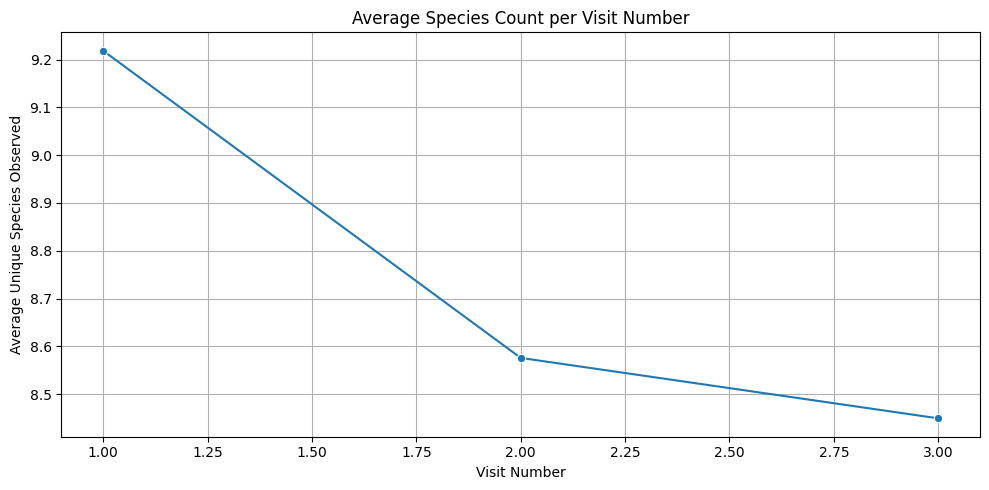

In [110]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=visit_species, x='Visit', y='Avg_Species_Per_Visit', marker='o')
plt.title("Average Species Count per Visit Number")
plt.xlabel("Visit Number")
plt.ylabel("Average Unique Species Observed")
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
    # Species most frequently on the PIF watchlist
watchlist_species = (
    combined_df[combined_df['PIF_Watchlist_Status'] == True]
    .groupby('Common_Name')
    .size()
    .reset_index(name='Watchlist_Obs_Count')
    .sort_values(by='Watchlist_Obs_Count', ascending=False)
    .head(10)
)
print("\nTop 10 PIF Watchlist Species:\n", watchlist_species)

# Species with highest regional stewardship priority
steward_species = (
    combined_df[combined_df['Regional_Stewardship_Status'] == True]
    .groupby('Common_Name')
    .size()
    .reset_index(name='Stewardship_Obs_Count')
    .sort_values(by='Stewardship_Obs_Count', ascending=False)
    .head(10)
)
print("\nTop 10 Regional Stewardship Species:\n", steward_species)



Top 10 PIF Watchlist Species:
              Common_Name  Watchlist_Obs_Count
6            Wood Thrush                  309
7    Worm-eating Warbler                   31
3        Prairie Warbler                   25
1       Cerulean Warbler                    7
5      Willow Flycatcher                    2
2       Kentucky Warbler                    2
0    Blue-winged Warbler                    1
4  Red-headed Woodpecker                    1

Top 10 Regional Stewardship Species:
            Common_Name  Stewardship_Obs_Count
11      Indigo Bunting                    611
8   Eastern Wood-Pewee                    574
9        Field Sparrow                    492
0   Acadian Flycatcher                    462
4   Carolina Chickadee                    366
17         Wood Thrush                    309
6     Downy Woodpecker                    260
7       Eastern Towhee                    257
16     Scarlet Tanager                    216
10      Hooded Warbler                     64


In [4]:
combined_df.to_csv("combined_df.csv", index=False)


In [5]:
combined_df.to_csv(r"C:\Users\tanishq\Desktop\bird specie analysis\combined_df.csv", index=False)
